# Test of ImageProcessingScript and MultiCycleAnalyzer libraries

In [1]:
from image_processing_script import ImageProcessingScript 
from multi_cycle_analyzer import MultiCycleAnalyzer

## ImageProcessingScript testing

### Example for 15.TIFF image with plots

In [4]:
CHIP_CONFIG = {
    "x1": 0.0, "y1": 0.0,
    "rx": 25, "ry": 25,
    "Nsides": 55,
    "px": 55,
    "py": 47.6,
    "Nx": 76, "Ny": 58,
    "theta": 0.0,

    # Сдвиги строк
    "odd_row_dx": 27.5,  "odd_row_dy": 0,
    "even_row_dx": 0, "even_row_dy": 0,

    # Сдвиги столбцов
    "odd_col_dx": 0,   "odd_col_dy": 0,
    "even_col_dx": 0,  "even_col_dy": 0,

    "x2": 0.0, "y2": 0.0,
    "Ncols": 2, "Nrows": 3,
    "dx": 4205, "dy": 2792
    }

analyzer1 = ImageProcessingScript(15)

analyzer1.load_image("B:/Python projects/ImageProcessingScript/dataset/15.TIFF")

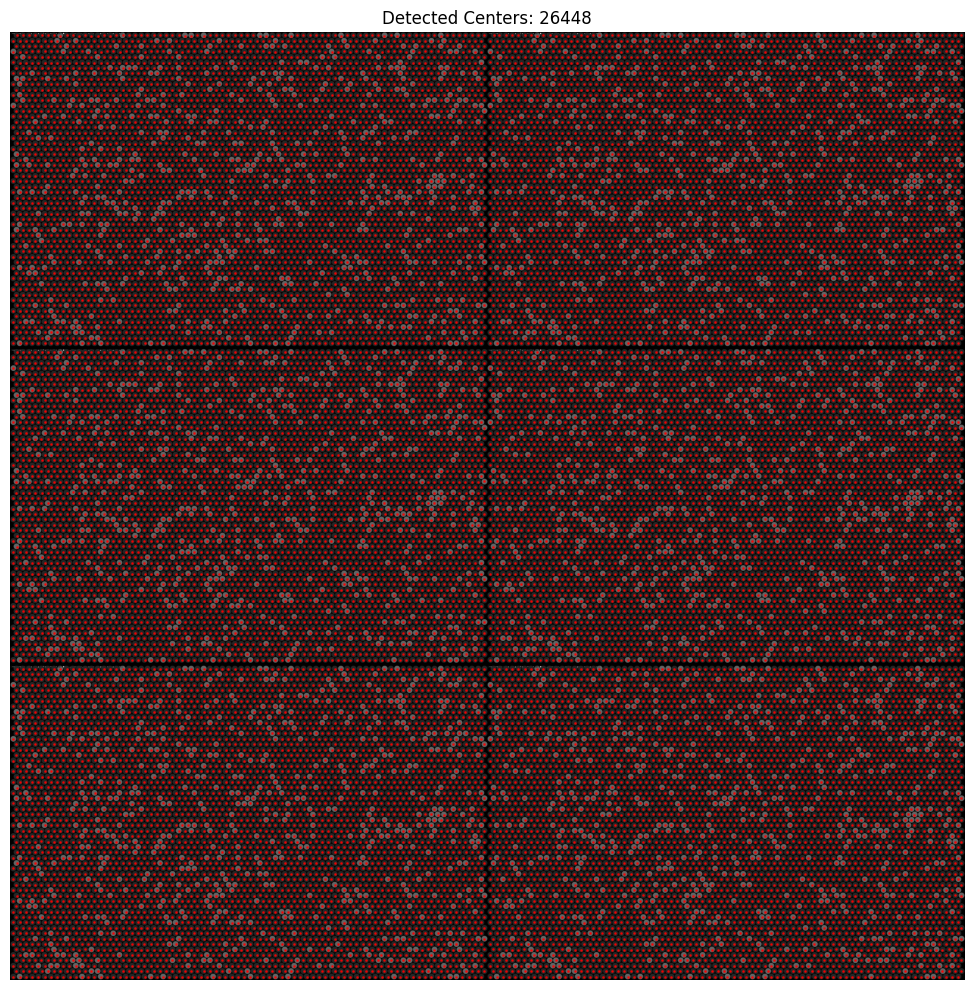

array([[1838, 1156],
       [4630, 1156],
       [7422, 1156],
       ...,
       [2602, 7726],
       [5394, 7726],
       [8186, 7726]], dtype=uint16)

In [6]:
analyzer1.detect_centers(25, "plot_yes", radius_step=1)

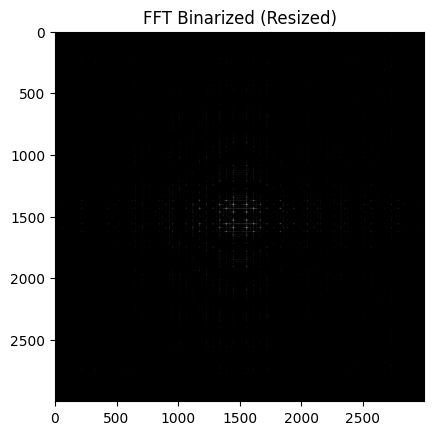

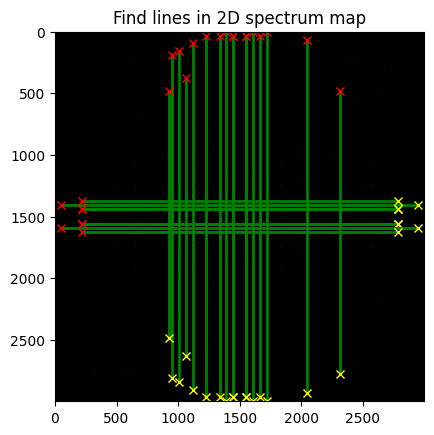

Angle_rotated = 0.0


In [10]:
analyzer1.CalSkewAngle("plot_yes", circle_range=6)

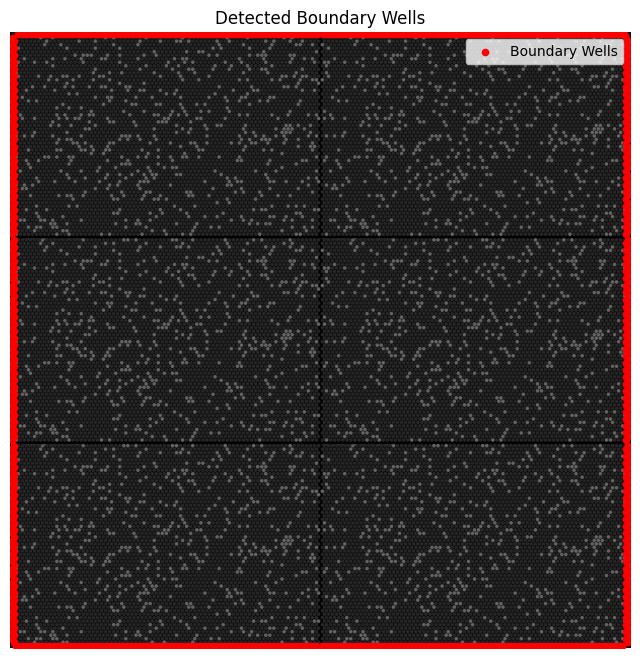

In [12]:
analyzer1.CalNewCoor()

analyzer1.Find_Boudary_Wells(105, 30, 30, 105, "plot_yes")

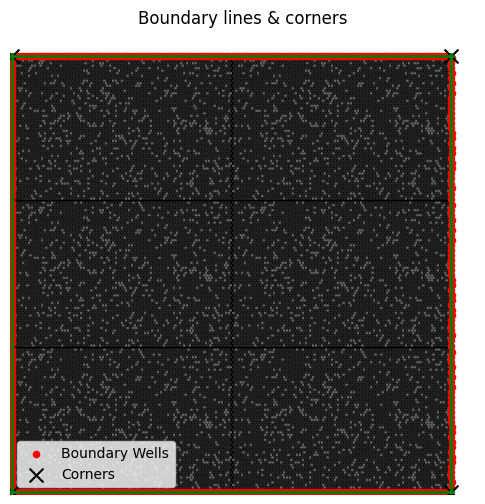

[(29.856918147804528, 28.48452381750842),
 (8386.784611476834, 28.36918049570791),
 (29.910842964174126, 8328.0),
 (8386.750469711213, 8327.999999999998)]

In [13]:
analyzer1.Find_Boudary_Corners("plot_yes")

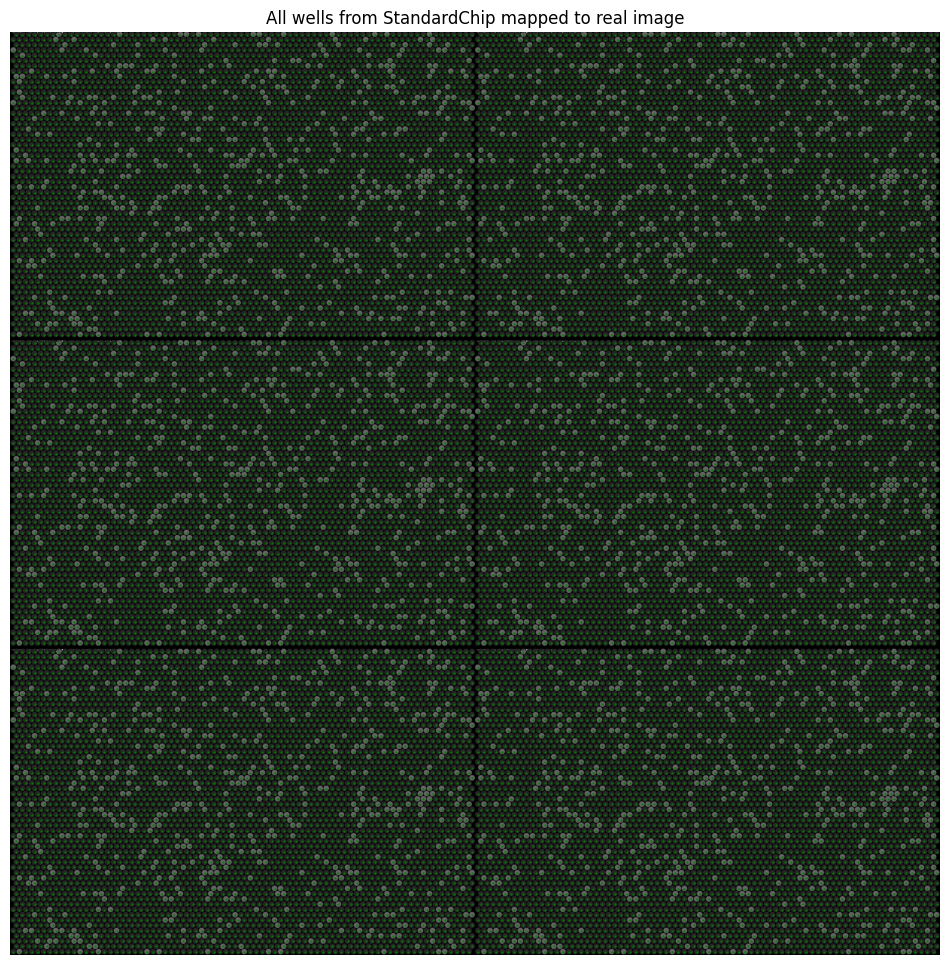

In [15]:
analyzer1.CalAllCoors(CHIP_CONFIG, "plot_yes")

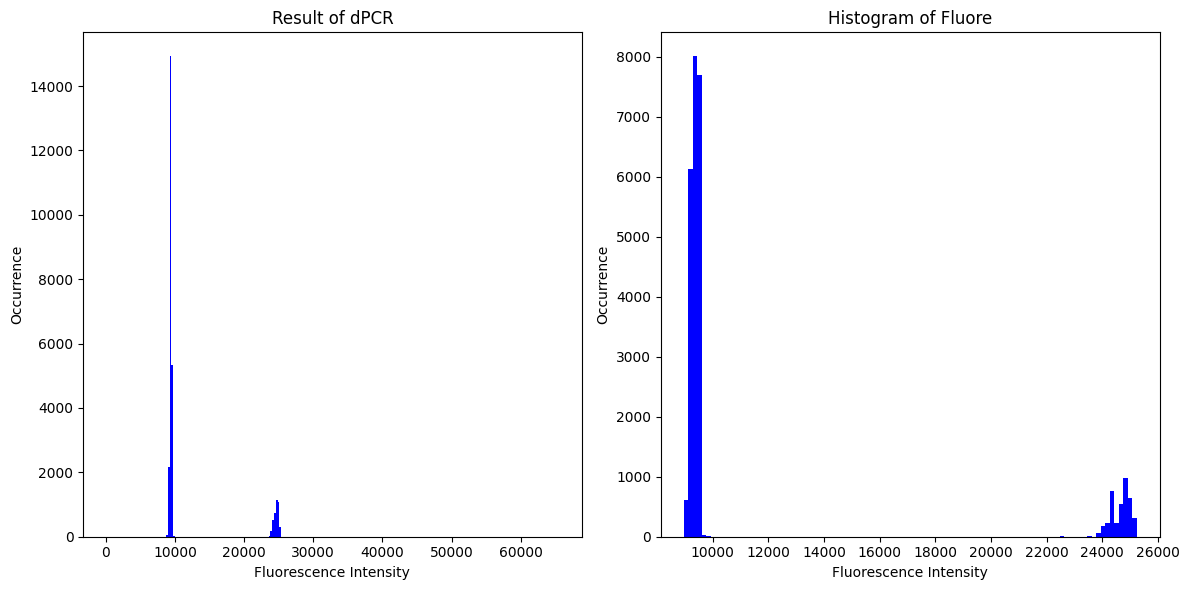

In [16]:
analyzer1.Get_Original_Fluo(25)

analyzer1.plot_fluo_histograms()

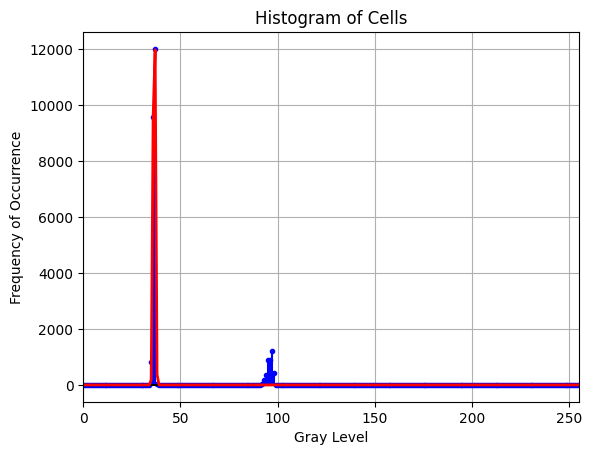

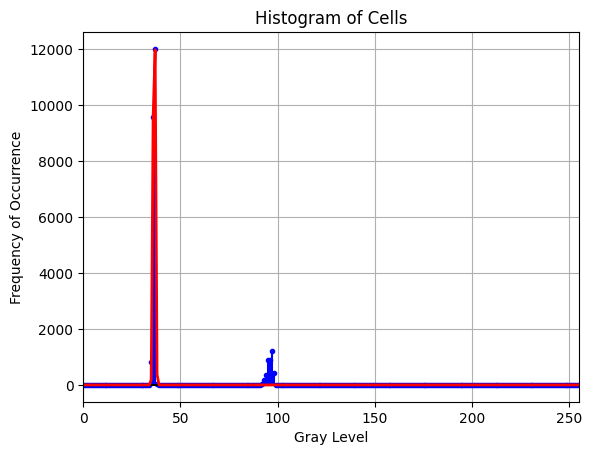

In [17]:
analyzer1.Find_IndValid_and_FluoreFilted(256, 0.05, 0.4, "plot_yes") 

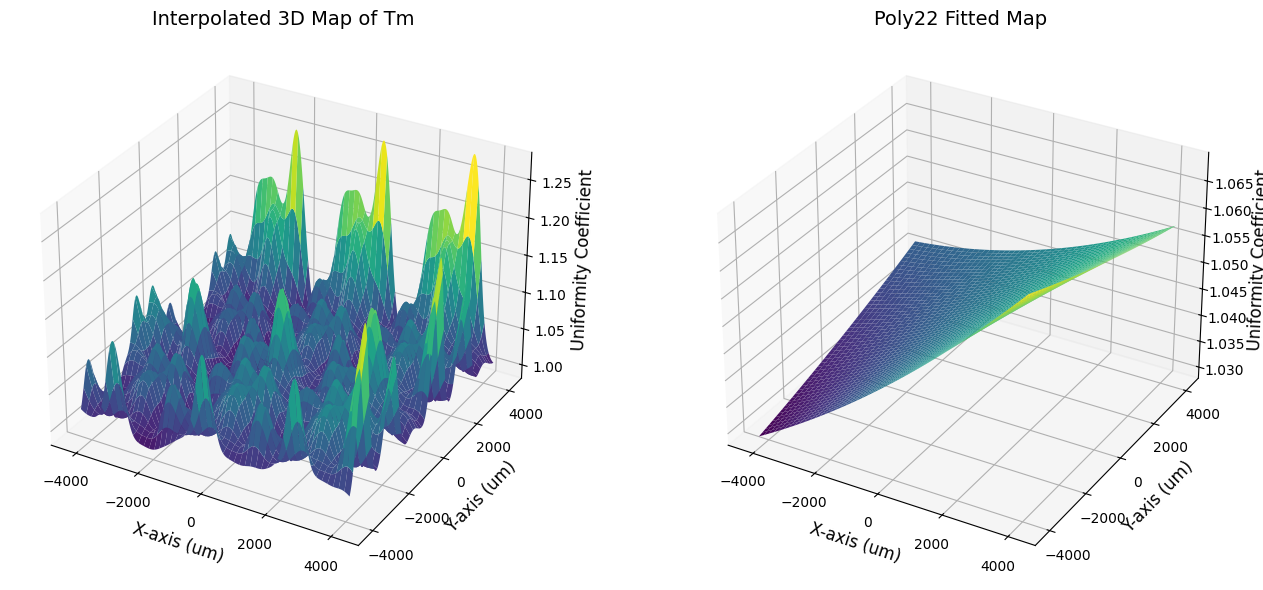

In [18]:
analyzer1.Show_3D_Map()

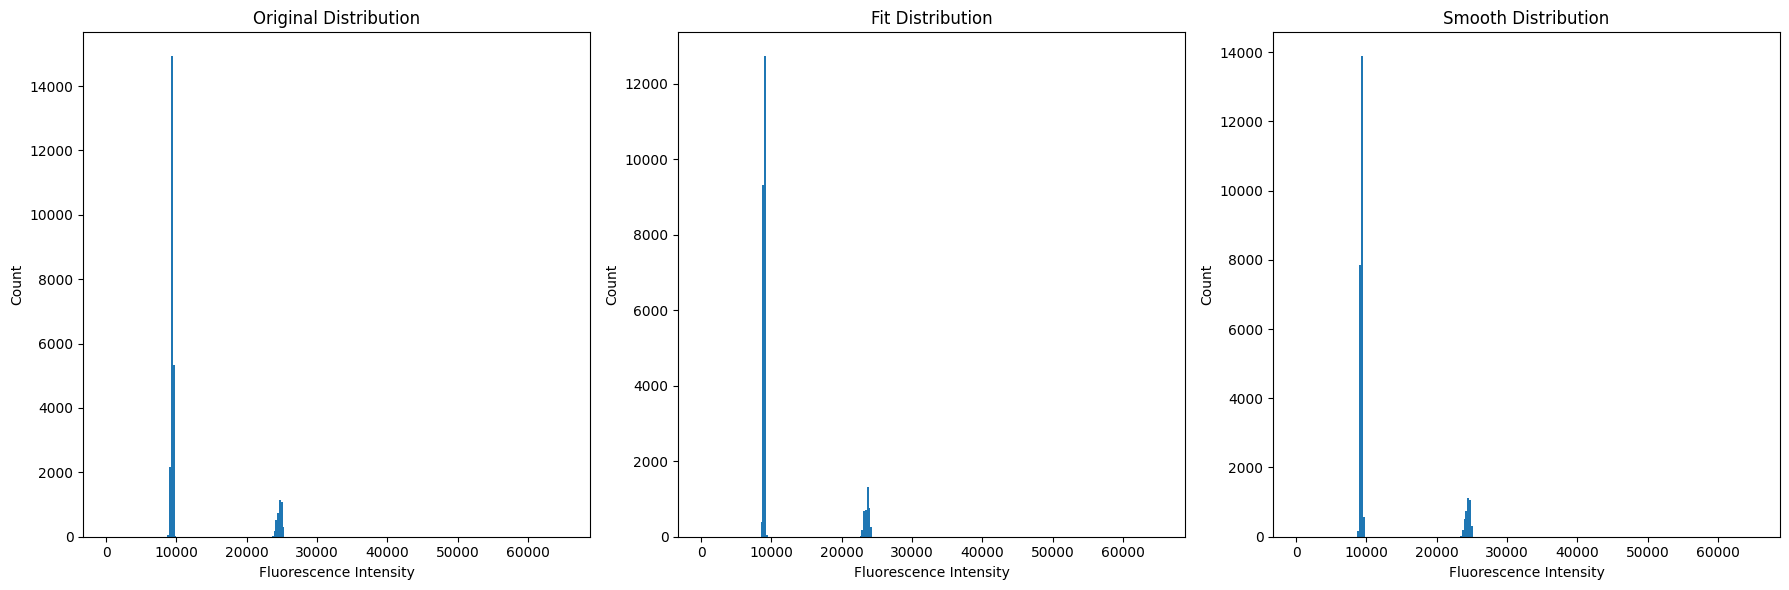

In [25]:
analyzer1.Generate3DMap_FitMethod()

analyzer1.Generate3DMap_SmoothMethod()

analyzer1.Get_All_Fluos(25, selection="all", plot_condition="plot_yes")

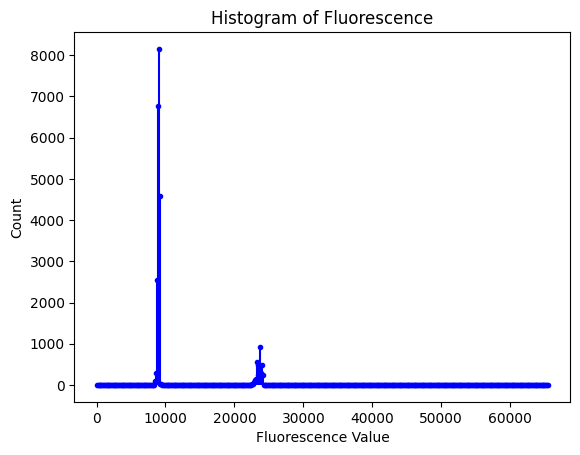

Dark wells  22482
Bright wells  3966
Number of genes is 4296.888920329141
lamda is 0.1624655520390631


In [26]:
analyzer1.Calculate_Genes_And_Lamda("fit", [3250, 15000, 26000], "plot_yes")

candidate T: inside_count = 0
candidate T.T: inside_count = 0
candidate inv(T): inside_count = 13224
candidate inv(T).T: inside_count = 26448
Selected transform: inv(T).T (maps 26448 wells inside image)


<Figure size 640x480 with 0 Axes>

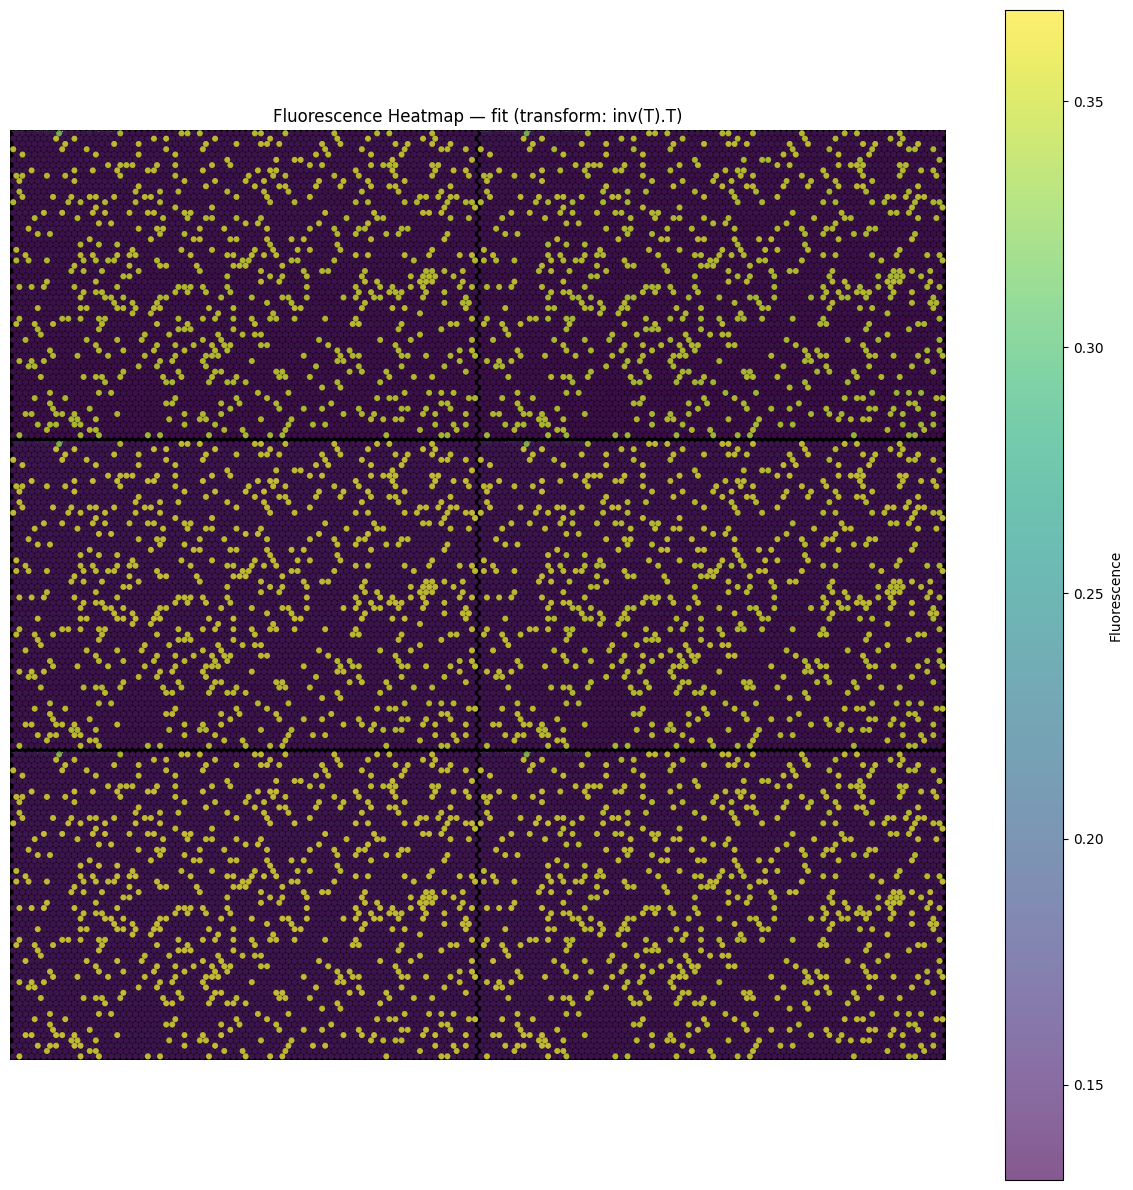

In [27]:
analyzer1.Show_Fluore_Heatmap(type="fit")

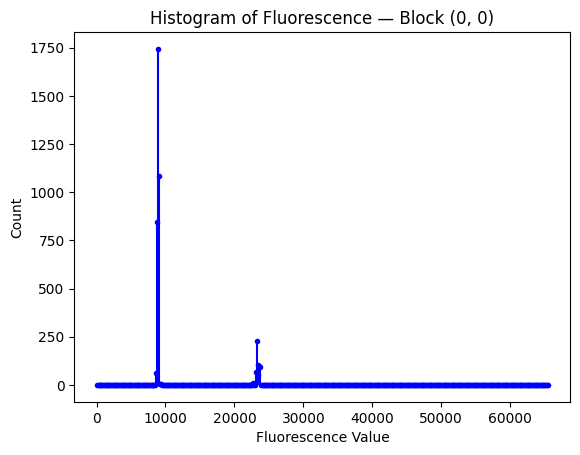

Block (0, 0) — Dark wells: 3747, Bright wells: 661
Genes: 716.1481533881902, Lambda: 0.1624655520390631


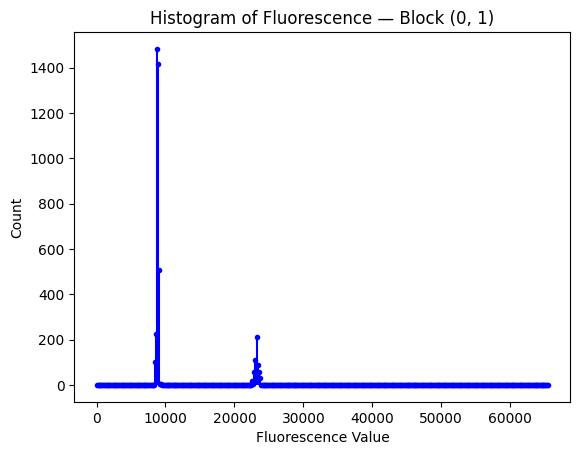

Block (0, 1) — Dark wells: 3747, Bright wells: 661
Genes: 716.1481533881902, Lambda: 0.1624655520390631


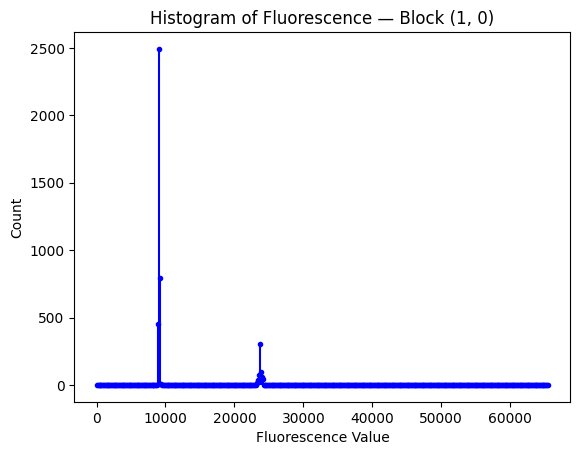

Block (1, 0) — Dark wells: 3747, Bright wells: 661
Genes: 716.1481533881902, Lambda: 0.1624655520390631


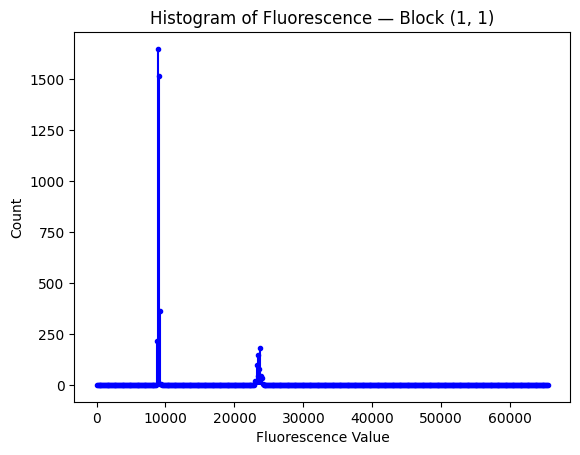

Block (1, 1) — Dark wells: 3747, Bright wells: 661
Genes: 716.1481533881902, Lambda: 0.1624655520390631


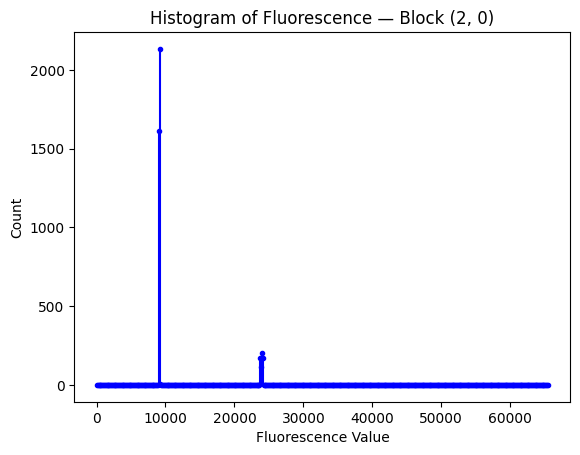

Block (2, 0) — Dark wells: 3747, Bright wells: 661
Genes: 716.1481533881902, Lambda: 0.1624655520390631


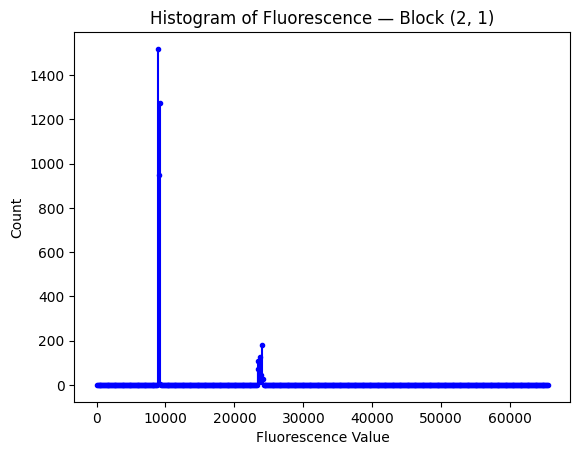

Block (2, 1) — Dark wells: 3747, Bright wells: 661
Genes: 716.1481533881902, Lambda: 0.1624655520390631


In [28]:
for row in range(CHIP_CONFIG["Nrows"]):
    for col in range(CHIP_CONFIG["Ncols"]):
        analyzer1.Calculate_Genes_And_Lamda_Block(row, col, "fit", [3250, 15000, 26000], "plot_yes")

In [30]:
# Check that we can get important values
print("Some image values:", analyzer1.get_image_rotated()[6][:120])
print("Some fluore values:", analyzer1.get_fluore()[:50])
print("Some fluores values:", analyzer1.get_fluores()[:50])
print("All wells count is:", analyzer1.get_all_wells_count())
print("Detected wells count is:", analyzer1.get_detected_wells_count())
print("Undetected wells count is:", analyzer1.get_undetected_wells_count())
print("lamda value is:", analyzer1.lamda_value())
print("Genes count is:", analyzer1.num_genes())
print("All info:", analyzer1.get_important_info())

Some image values: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.14901961 0.14901961
 0.14901961 0.14901961 0.14901961 0.14901961 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.14901961 0.14901961 0.14901961
 0.14901961 0.14901961 0.14901961 0.14901961 0.14901961 0.14901961
 0.14901961 0.14901961 0.14901961 0.14901961 0.14901961 0.14901961
 0.14901961 0.14901961 0.14901961 0.14901961 0.14901961 0.14901961
 0.14901961 0.14901961 0.14901961 0.14901961 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.14901961 

### Example for chip_55.tif image without any plots

In [2]:
CHIP_CONFIG = {
    "x1": 0.0, "y1": 0.0,
    "rx": 25, "ry": 25,
    "Nsides": 55,
    "px": 55,
    "py": 47.6,
    "Nx": 76, "Ny": 58,
    "theta": 0.0,

    # Сдвиги строк
    "odd_row_dx": 27.5,  "odd_row_dy": 0,
    "even_row_dx": 0, "even_row_dy": 0,

    # Сдвиги столбцов
    "odd_col_dx": 0,   "odd_col_dy": 0,
    "even_col_dx": 0,  "even_col_dy": 0,

    "x2": 0.0, "y2": 0.0,
    "Ncols": 2, "Nrows": 3,
    "dx": 4205, "dy": 2792
    }

analyzer2 = ImageProcessingScript(55)

analyzer2.load_image("B:/Python projects/ImageProcessingScript/dataset/55.TIFF")

analyzer2.detect_centers(25, "plot_no", radius_step=1)

analyzer2.CalSkewAngle("plot_no", circle_range=6)

analyzer2.CalNewCoor()

analyzer2.Find_Boudary_Wells(105, 30, 30, 105, "plot_no")

analyzer2.Find_Boudary_Corners("plot_no")

analyzer2.CalAllCoors(CHIP_CONFIG, "plot_no")

analyzer2.Get_Original_Fluo(25)

analyzer2.Find_IndValid_and_FluoreFilted(256, 0.05, 0.4, "plot_no")

analyzer2.Generate3DMap_FitMethod()

analyzer2.Generate3DMap_SmoothMethod()

analyzer2.Get_All_Fluos(25, selection="all", plot_condition="plot_no")

analyzer2.Calculate_Genes_And_Lamda("fit", [3250, 15000, 26000], "plot_no")

for row in range(CHIP_CONFIG["Nrows"]):
    for col in range(CHIP_CONFIG["Ncols"]):
        analyzer2.Calculate_Genes_And_Lamda_Block(row, col, "fit", [3250, 15000, 26000], "plot_no")

print("Some image values:", analyzer2.get_image_rotated()[6][:120])
print("Some fluore values:", analyzer2.get_fluore()[:50])
print("Some fluores values:", analyzer2.get_fluores()[:50])
print("All wells count is:", analyzer2.get_all_wells_count())
print("Detected wells count is:", analyzer2.get_detected_wells_count())
print("Undetected wells count is:", analyzer2.get_undetected_wells_count())
print("lamda value is:", analyzer2.lamda_value())
print("Genes count is:", analyzer2.num_genes())
print("All info:", analyzer2.get_important_info())

Angle_rotated = 0.0
Dark wells  11904
Bright wells  14544
Number of genes is 21113.598753904833
lamda is 0.7983060629879323
Block (0, 0) — Dark wells: 1984, Bright wells: 2424
Genes: 3518.9331256508053, Lambda: 0.7983060629879323
Block (0, 1) — Dark wells: 1984, Bright wells: 2424
Genes: 3518.9331256508053, Lambda: 0.7983060629879323
Block (1, 0) — Dark wells: 1984, Bright wells: 2424
Genes: 3518.9331256508053, Lambda: 0.7983060629879323
Block (1, 1) — Dark wells: 1984, Bright wells: 2424
Genes: 3518.9331256508053, Lambda: 0.7983060629879323
Block (2, 0) — Dark wells: 1984, Bright wells: 2424
Genes: 3518.9331256508053, Lambda: 0.7983060629879323
Block (2, 1) — Dark wells: 1984, Bright wells: 2424
Genes: 3518.9331256508053, Lambda: 0.7983060629879323
Some image values: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        

## MultiCycleAnalyzer testing

In [45]:
CHIP_CONFIG = {
    "x1": 0.0, "y1": 0.0,
    "rx": 25, "ry": 25,
    "Nsides": 55,
    "px": 55,
    "py": 47.6,
    "Nx": 76, "Ny": 58,
    "theta": 0.0,

    # Сдвиги строк
    "odd_row_dx": 27.5,  "odd_row_dy": 0,
    "even_row_dx": 0, "even_row_dy": 0,

    # Сдвиги столбцов
    "odd_col_dx": 0,   "odd_col_dy": 0,
    "even_col_dx": 0,  "even_col_dy": 0,

    "x2": 0.0, "y2": 0.0,
    "Ncols": 2, "Nrows": 3,
    "dx": 4205, "dy": 2792
              }

cycle_list = []

for i in range(21):
    analyzer = ImageProcessingScript(5*i)
    
    analyzer.load_image("B:/Python projects/ImageProcessingScript/dataset/" + str(5*i) + ".TIFF")
    
    analyzer.detect_centers(25, "plot_no", radius_step=1)
    
    analyzer.CalSkewAngle("plot_no", circle_range=3)
    
    analyzer.CalNewCoor()
    
    analyzer.Find_Boudary_Wells(105, 30, 30, 105, "plot_no")
    
    analyzer.Find_Boudary_Corners("plot_no")
    
    analyzer.CalAllCoors(CHIP_CONFIG, "plot_no")
    
    analyzer.Get_Original_Fluo(25)
    
    analyzer.Find_IndValid_and_FluoreFilted(256, 0.05, 0.4, "plot_no") 
    
    analyzer.Get_All_Fluos(25, selection=["original"], plot_condition="plot_no")
    
    analyzer.Calculate_Genes_And_Lamda("original", [3250, 15000, 26000], "plot_no")
    
    for row in range(CHIP_CONFIG["Nrows"]):
        for col in range(CHIP_CONFIG["Ncols"]):
            analyzer.Calculate_Genes_And_Lamda_Block(row, col, "original", [3250, 15000, 26000], "plot_no")


    cycle_list.append(analyzer.get_important_info())

Angle_rotated = 0.0
Dark wells  26448
Bright wells  0
Number of genes is -0.0
lamda is -0.0
Block (0, 0) — Dark wells: 4408, Bright wells: 0
Genes: -0.0, Lambda: -0.0
Block (0, 1) — Dark wells: 4408, Bright wells: 0
Genes: -0.0, Lambda: -0.0
Block (1, 0) — Dark wells: 4408, Bright wells: 0
Genes: -0.0, Lambda: -0.0
Block (1, 1) — Dark wells: 4408, Bright wells: 0
Genes: -0.0, Lambda: -0.0
Block (2, 0) — Dark wells: 4408, Bright wells: 0
Genes: -0.0, Lambda: -0.0
Block (2, 1) — Dark wells: 4408, Bright wells: 0
Genes: -0.0, Lambda: -0.0
Angle_rotated = 0.0
Dark wells  25128
Bright wells  1320
Number of genes is 1354.0788548217567
lamda is 0.051197778842322926
Block (0, 0) — Dark wells: 4188, Bright wells: 220
Genes: 225.67980913695945, Lambda: 0.051197778842322926
Block (0, 1) — Dark wells: 4188, Bright wells: 220
Genes: 225.67980913695945, Lambda: 0.051197778842322926
Block (1, 0) — Dark wells: 4188, Bright wells: 220
Genes: 225.67980913695945, Lambda: 0.051197778842322926
Block (1, 1)

In [3]:
import pickle

def save_dict_to_pickle(dictionary, filename):
    with open(filename, 'wb') as file:
        pickle.dump(dictionary, file)

# Загрузка словаря из файла
def load_dict_from_pickle(filename):
    with open(filename, 'rb') as file:
        dictionary = pickle.load(file)
    return dictionary

In [11]:
all_data = {}
for cycle_dict in cycle_list:     
    all_data.update(cycle_dict)    
save_dict_to_pickle(all_data, "test_dict.pkl")

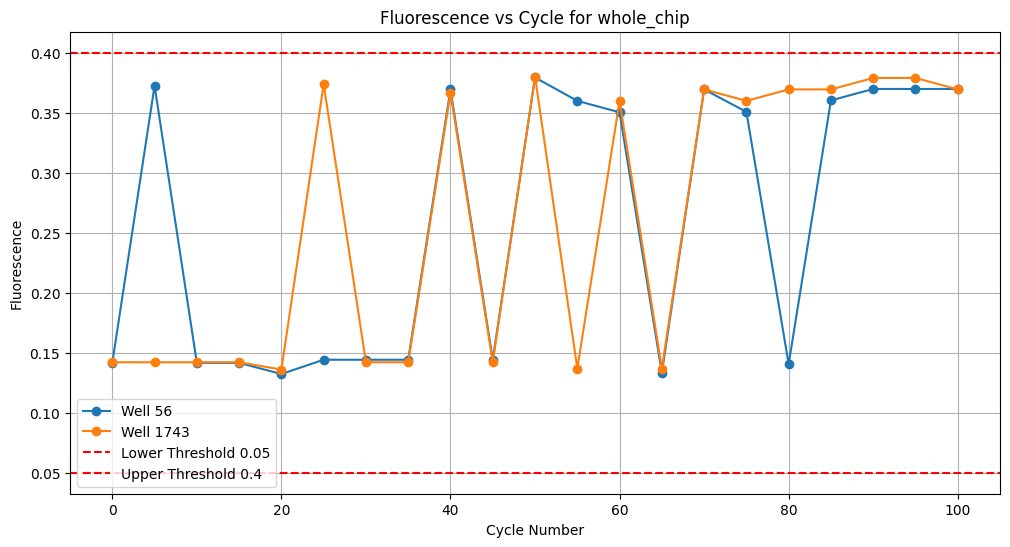

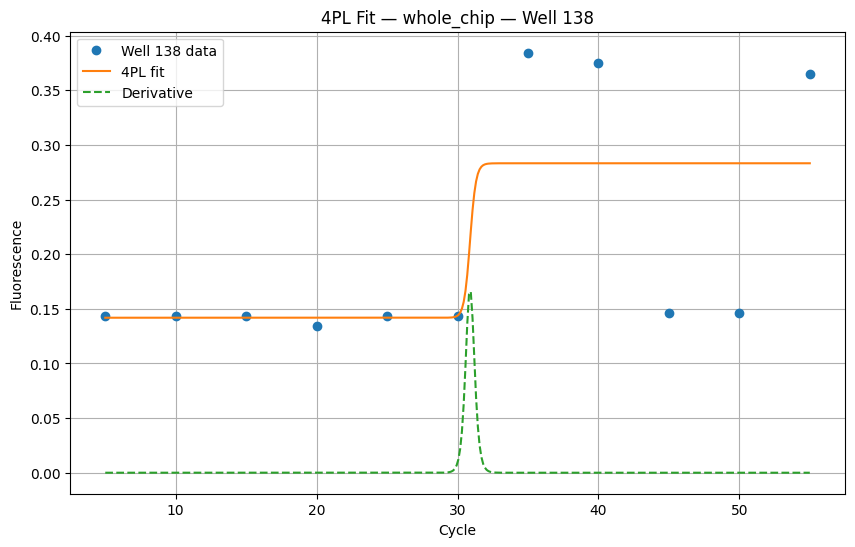

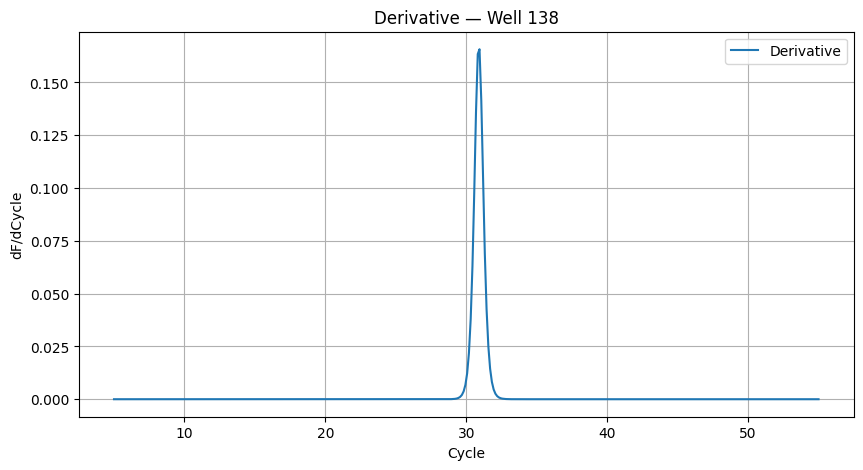

In [10]:
all_data = load_dict_from_pickle("test_dict.pkl")

CHIP_CONFIG = {
    "x1": 0.0, "y1": 0.0,
    "rx": 25, "ry": 25,
    "Nsides": 55,
    "px": 55,
    "py": 47.6,
    "Nx": 76, "Ny": 58,
    "theta": 0.0,

    # Сдвиги строк
    "odd_row_dx": 27.5,  "odd_row_dy": 0,
    "even_row_dx": 0, "even_row_dy": 0,

    # Сдвиги столбцов
    "odd_col_dx": 0,   "odd_col_dy": 0,
    "even_col_dx": 0,  "even_col_dy": 0,

    "x2": 0.0, "y2": 0.0,
    "Ncols": 2, "Nrows": 3,
    "dx": 4205, "dy": 2792
    }

cycle_analyzer = MultiCycleAnalyzer(all_data, CHIP_CONFIG)

cycle_analyzer.plot_fluorescence_time_series('whole_chip', [56, 1743], 0.05, 0.4)

cycle_analyzer.fit_reference_4pl(
    type_key="whole_chip",
    ref_index=138,
    start_cycle=5, end_cycle=55   
)